# Tugas Besar 1D - Pembelajaran Mesin


#### Anggota Kelompok
1. Ahmad Mutawalli - 13517026, K02
2. Harry Rahmadi Munly - 13517033, K03
3. Ardysatrio Fakhri Haroen - 13517062, K02
4. Dandi Agus Maulana - 13517077, K02

## Import Dependencies and Load Data

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import os
import sys

from dtl.myC45 import Tree as MyC45
from mlp.MyMLP import Network as MyMLP

import warnings
warnings.filterwarnings('ignore')

In [99]:
#Load dataset
X_iris, y_iris = load_iris(return_X_y=True)
iris_data = pd.DataFrame(X_iris, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']); iris_data['label'] = y_iris
iris_data = iris_data.sample(frac=1)
X_iris = iris_data.drop('label', axis=1)
y_iris = iris_data['label']
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,label
148,6.2,3.4,5.4,2.3,2
113,5.7,2.5,5.0,2.0,2
99,5.7,2.8,4.1,1.3,1
95,5.7,3.0,4.2,1.2,1
124,6.7,3.3,5.7,2.1,2


## Define Functions and Procedures

In [100]:
#mencetak confusion matrix dengan layout yang mudah dilihat
def print_confusion_matrix(y_test, pred_result):
    cm = confusion_matrix(y_test, pred_result)
    cm = pd.DataFrame(cm, index=[i for i in range(3)], columns=[i for i in range(3)])
    sns.heatmap(cm, annot=True)
    plt.show()
    
#menghitung skor akurasi     
def accuracy_score(target, pred):
    sums = 0
    for i in range(len(pred)):
        if(pred[i] == target[i]):
           sums += 1
    return float(sums)/float(len(pred))

#Membagi data dengan cross-validation
def split_data_crossval(X, y, n_split=10):
    #Splitting data: KFold Cross Validation Indexing
    kfold = KFold(n_splits=n_split)
    split = kfold.split(X, y)

    train_indexes = []
    test_indexes = []
    for train, test in split:
        train_indexes.append(train)
        test_indexes.append(test)
    
    return train_indexes, test_indexes 

#melakukan iterasi k-fold cross validation
def cross_validate(X, y, model_name):
    
    #get train and test indexes
    train_indexes, test_indexes = split_data_crossval(X, y)

    scores = []
    #for each indexes in train_idx, train and test the model on it
    for train_idx, test_idx in zip(train_indexes, test_indexes):
        X_train = X[train_idx]; y_train = y[train_idx]
        X_test = X[test_idx]; y_test = y[test_idx]
        
        if(model_name == 'c45'):
            #train model
            train_data = pd.DataFrame(X_train, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
            train_data['label'] = pd.Series(y_train)
            
            test_data = pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
            test_data['label'] = pd.Series(y_test)
                        
            clf = MyC45(train_data, 'label')
            clf.make_tree()
            
            #get result
            pred_result = clf.predict(pd.DataFrame(test_data))
            #get accuracy
            scores.append(accuracy_score(pred_result, y_test))
            
        elif(model_name == 'mlp'):
            #train model
            net = MyMLP(4, 4)
            net.fit(X_train, y_train, epoch_limit=100)
            
            #get result
            pred_result = net.predict(X_test)
            #get accuracy
            scores.append(accuracy_score(pred_result, y_test))
            
    #return list of cross val scores
    return scores
               


## Train Test Split and Confusion Matrix

### Model C4.5

-------predict-------
Prediction Accuracy: 93.33333333333333%
CONFUSION MATRIX (Row:True, Column:Prediction)


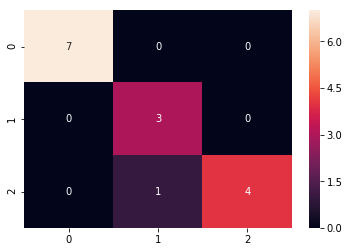

In [104]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.1, random_state=42)

#train model
train_data = pd.DataFrame(X_train, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
train_data['label'] = pd.Series(y_train)
            
test_data = pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
test_data['label'] = pd.Series(y_test)

clf = MyC45(train_data, 'label')
clf.make_tree()

#get result
pred_result = clf.predict(pd.DataFrame(test_data))

#print Accuracy
print("Prediction Accuracy: ", accuracy_score(y_test.values, pred_result) * 100 , "%", sep='')

#print confusion matrix
print("CONFUSION MATRIX (Row:True, Column:Prediction)")
print_confusion_matrix(y_test, pred_result)

### Model MLP

Prediction Accuracy: 93.33333333333333%
CONFUSION MATRIX (Row:True, Column:Prediction)


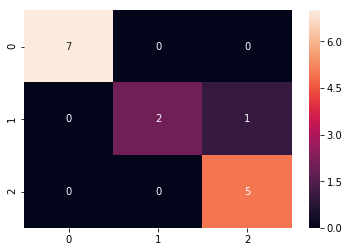

In [108]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.1, random_state=42)

#train model
net = MyMLP(4, 4)
net.fit(X_train.values, y_train.values, epoch_limit=100)

#get result
pred_result = net.predict(X_test.values)

#print Accuracy
print("Prediction Accuracy: ", accuracy_score(y_test.values, pred_result) * 100 , "%", sep='')

#print confusion matrix
print("CONFUSION MATRIX (Row:True, Column:Prediction)")
print_confusion_matrix(y_test, pred_result)

## 10-fold Cross Validation

### Model C4.5

In [ ]:
c45_score = cross_validate(X_iris.values, y_iris.values, 'c45')
print("Average From 10-fold Cross Validation with C4.5:", np.mean(np.array(c45_score)))

-------predict-------
-------predict-------


### Model MLP

In [ ]:
mlp_score = cross_validate(X_iris.values, y_iris, 'mlp')
print("Average From 10-fold Cross Validation with MLP:", np.mean(np.array(mlp_score)))